## Gradient Accumulation OFF - FP32

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import os

In [3]:
gpu_device = 1
defaults.device = torch.device(f'cuda:{gpu_device}')
torch.cuda.set_device(gpu_device)

In [4]:
BS = 32

In [5]:
path = untar_data(URLs.PETS); path

PosixPath('/home/haider/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/home/haider/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/haider/.fastai/data/oxford-iiit-pet/models'),
 PosixPath('/home/haider/.fastai/data/oxford-iiit-pet/images')]

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/haider/.fastai/data/oxford-iiit-pet/images/leonberger_84.jpg'),
 PosixPath('/home/haider/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_78.jpg'),
 PosixPath('/home/haider/.fastai/data/oxford-iiit-pet/images/newfoundland_13.jpg'),
 PosixPath('/home/haider/.fastai/data/oxford-iiit-pet/images/english_setter_63.jpg'),
 PosixPath('/home/haider/.fastai/data/oxford-iiit-pet/images/Persian_38.jpg')]

In [9]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [10]:
seed_everything(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

In [11]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=BS
                                  ).normalize(imagenet_stats)

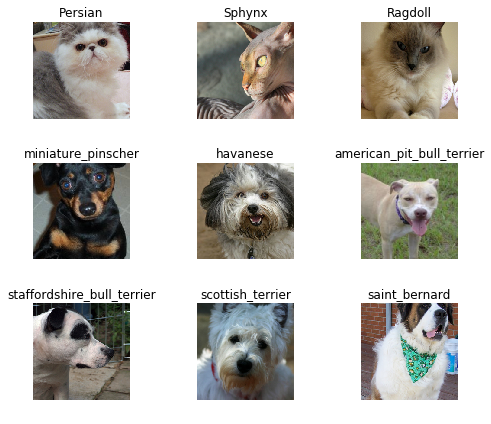

In [12]:
data.show_batch(rows=3, figsize=(7,6))

## Training: resnet34

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


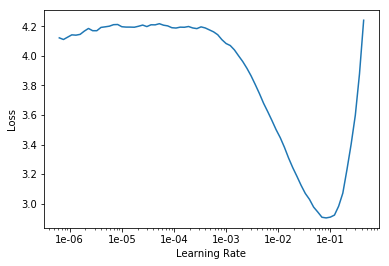

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.913045,0.300995,0.092016
2,0.457373,0.233575,0.081867
3,0.347617,0.189032,0.064953
4,0.278514,0.184071,0.060893


### Unfreezing, fine-tuning, and learning rates

In [16]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


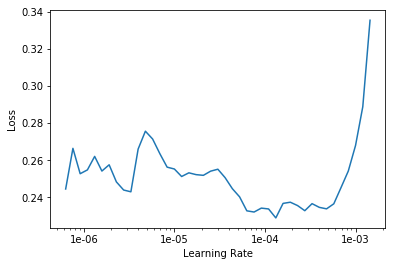

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.240117,0.185994,0.060217
2,0.238432,0.182789,0.059540


# Training: resnet50

In [19]:
seed_everything(2)

In [20]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=BS).normalize(imagenet_stats)

In [21]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


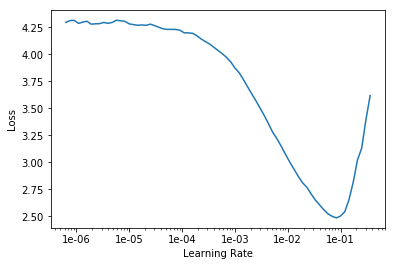

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,0.622148,0.241122,0.076455
2,0.382964,0.245222,0.077808
3,0.275009,0.199915,0.064276
4,0.175932,0.171225,0.054804
5,0.137049,0.149152,0.050068


### Unfreeze

In [24]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


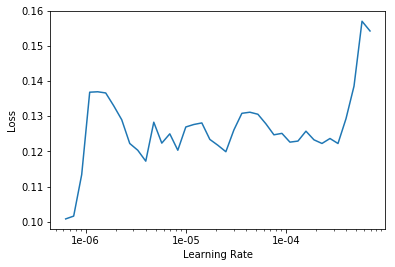

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.122733,0.157775,0.054804
2,0.116467,0.153158,0.050744
3,0.091712,0.146714,0.050744
